# Pulse Timing and Plotting

## Overview
This document describes the procedures and methods for pulse timing and plotting typical of a Particle Image Velocimetry (PIV) experiment. PIV is an optical method of flow visualization used to obtain instantaneous velocity measurements and related properties in fluid flows. Accurate timing of pulsed illumination sources and imagining devices (e.g., cameras) is key for this measurement technique to work as intended. A timing device ensures that all comonents of a PIV experiment are operating at the intended frequency. The pulse pattern of a timing device directly contributes the performance of a PIV system. This is why it is important to understand how to create pulse patterns and create a visualization of them for further data-informed decisions.

## Purpose
This example creates a simple pulse sequence and plots it for visualization purposes. In a typical experiement, the pulse parameters will be loaded into an OpenSync device once they are deemed sufficient for the purpose of the experiment being performed. However, the loading and executing of pulse sequences will not be discussed in this document.

## Creating the Pulse Paramters
There are several ways of creating pulse parameters of which the most simple one will be discussed below. The pulse sequence we are trying to model is a single camera and a dual-head flashlamp-pumped laser. A dual-head flashlamp-pumped laser consists of four inputs: flashlamp 1, flashlamp 2, q-switch 1, and q-switch 2. The flashlamps in this case need to be turned on 160 microseconds before the active q-switch and each pulse needs to be 50 microseconds wide. For the purposes of this demonstration, the itnerframe tiem between laser pulses will be 300 microseconds. The camera will be externally triggered so that the exposure is synchronized with the laser pulses. The exposure of the camera is internally set to 2,000 microseconds, so we do not have to worry about externally controlling the exposure. Finally, the external trigger for the camera must be 25 microseconds long.

## Imports
To begin, we need to import some functions from the package opensync and matplotlib

In [1]:
from matplotlib import pyplot as plt
from opensync import opensync 

## Create the Pulse Parameters Structure
All pulse paramters in this instance are held using a dictionary structure. The dictionary structure contains information for external triggers, repetition rate, and the state of each channel.

In [2]:
pulse_params = opensync.get_pulse_params()
pulse_params

{'pulse_id': 0,
 'clock_id': 0,
 'clock_divider': 1,
 'channel_0': {'name': 'channel_0', 'data': []},
 'channel_1': {'name': 'channel_1', 'data': []},
 'channel_2': {'name': 'channel_2', 'data': []},
 'channel_3': {'name': 'channel_3', 'data': []},
 'channel_4': {'name': 'channel_4', 'data': []},
 'channel_5': {'name': 'channel_5', 'data': []},
 'channel_6': {'name': 'channel_6', 'data': []},
 'channel_7': {'name': 'channel_7', 'data': []},
 'channel_8': {'name': 'channel_8', 'data': []},
 'channel_9': {'name': 'channel_9', 'data': []},
 'channel_10': {'name': 'channel_10', 'data': []},
 'channel_11': {'name': 'channel_11', 'data': []}}

## Populate the Pulse Paramters Structure
With the structure created, we can now populate the necessary channels with the pulse information as needed.

In [3]:
exposure = 2000
exposure_blind_time = 50

exposure_1_end = exposure
exposure_2_start = exposure

interframe_time = 300
half_inter_time = interframe_time // 2

flash_delay = 160
ttl_pulse_width = 50

# Camera pulse sequence
pulse_params = opensync.insert_pulse(
    pulse_params,
    0,
    25,
    channel_id=0,
    channel_name='camera trigger'
)

# Camera exposure for visualization purposes
pulse_params = opensync.insert_pulse(
    pulse_params,
    0,
    exposure_1_end,
    exposure_2_start + exposure_blind_time,
    exposure_2_start + exposure_blind_time + exposure,
    channel_id=1,
    channel_name='camera exposure'
)

# q-swtich 1
pulse_params = opensync.insert_pulse(
    pulse_params,
    exposure_1_end - half_inter_time,
    exposure_1_end + ttl_pulse_width - half_inter_time,
    channel_id=2,
    channel_name='q-swtich 1'
)

# q-switch 2
pulse_params = opensync.insert_pulse(
    pulse_params,
    exposure_2_start + half_inter_time,
    exposure_2_start + ttl_pulse_width + half_inter_time,
    channel_id=3,
    channel_name='q-swtich 2'
)

# flashlamp 1
pulse_params = opensync.insert_pulse(
    pulse_params,
    exposure_1_end - flash_delay - half_inter_time,
    exposure_1_end - flash_delay + ttl_pulse_width - half_inter_time,
    channel_id=4,
    channel_name='flashlamp 1'
)

# flashlamp 2
pulse_params = opensync.insert_pulse(
    pulse_params,
    exposure_2_start - flash_delay + half_inter_time,
    exposure_2_start - flash_delay + ttl_pulse_width + half_inter_time,
    channel_id=5,
    channel_name='flashlamp 2'
)

## Plotting the Pulse Parameters
To visualize the pulse paramters, we can create a plot and observe the results. The plotting utilities in OpenSync do not create matplotlib plotting instances, so we have to do that manually.

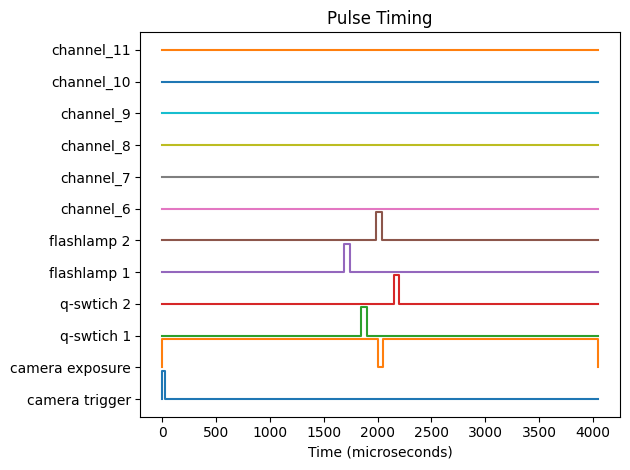

In [4]:
fig, ax = plt.subplots()
opensync.get_pulse_plot(pulse_params, ax)
fig.tight_layout()